### Workflow exercises

.1 Create a straight line dataset using the linear regression formula `weight * X + bias`.
.2 Build a PyTorch linear model
.3 Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
.4 Make predictions with the trained model on the test data.

In [ ]:
# Import requirements
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

In [38]:
weight = 0.3
bias = 0.9
X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = X * weight + bias
split_point = int(0.8 * len(X))
X_train, Y_train = X[:split_point], y[:split_point]
X_test, Y_test = X[split_point:], y[split_point:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

In [39]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.9000],
         [0.9060],
         [0.9120],
         [0.9180],
         [0.9240],
         [0.9300],
         [0.9360],
         [0.9420],
         [0.9480],
         [0.9540]]))

In [5]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None):
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  # Show the legend
  plt.legend(prop={"size": 14})

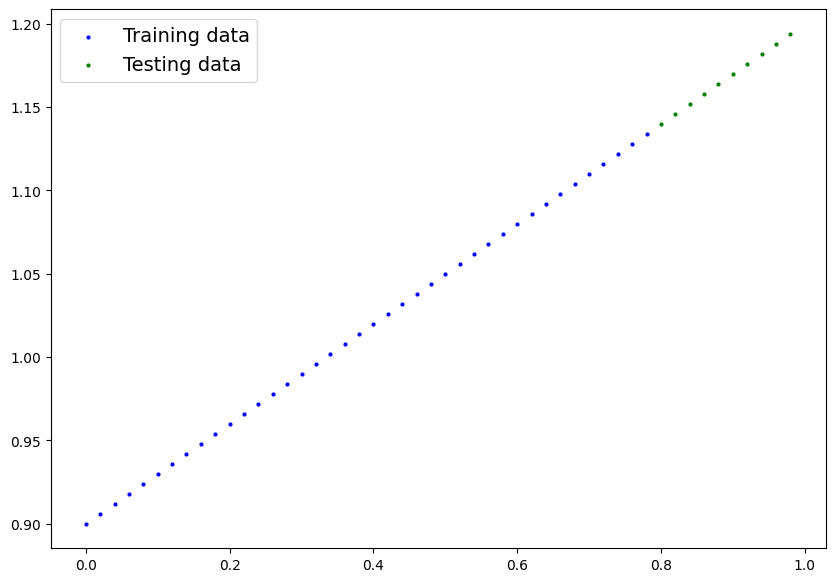

In [40]:
plot_predictions(X_train, Y_train, X_test, Y_test)

In [46]:
class SimpleLinear(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [56]:
torch.manual_seed(42)
model = SimpleLinear()
model, model.state_dict()

(SimpleLinear(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [57]:
loss_fn = nn.L1Loss()
optim = torch.optim.SGD(model.parameters(), lr=0.01)

In [58]:
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(300):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, Y_train)
    optim.zero_grad()
    loss.backward()
    optim.step()
    if epoch % 20 == 0:
        with torch.inference_mode():
            model.eval()
            test_pred = model(X_test)
            test_loss = loss_fn(test_pred, Y_test.type(torch.float))
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.126 | Test loss: 0.334
Epoch: 20 | Train loss: 0.082 | Test loss: 0.219
Epoch: 40 | Train loss: 0.072 | Test loss: 0.175
Epoch: 60 | Train loss: 0.065 | Test loss: 0.153
Epoch: 80 | Train loss: 0.058 | Test loss: 0.136
Epoch: 100 | Train loss: 0.051 | Test loss: 0.120
Epoch: 120 | Train loss: 0.045 | Test loss: 0.103
Epoch: 140 | Train loss: 0.038 | Test loss: 0.087
Epoch: 160 | Train loss: 0.031 | Test loss: 0.072
Epoch: 180 | Train loss: 0.024 | Test loss: 0.055
Epoch: 200 | Train loss: 0.017 | Test loss: 0.039
Epoch: 220 | Train loss: 0.010 | Test loss: 0.023
Epoch: 240 | Train loss: 0.003 | Test loss: 0.007
Epoch: 260 | Train loss: 0.007 | Test loss: 0.003
Epoch: 280 | Train loss: 0.007 | Test loss: 0.003


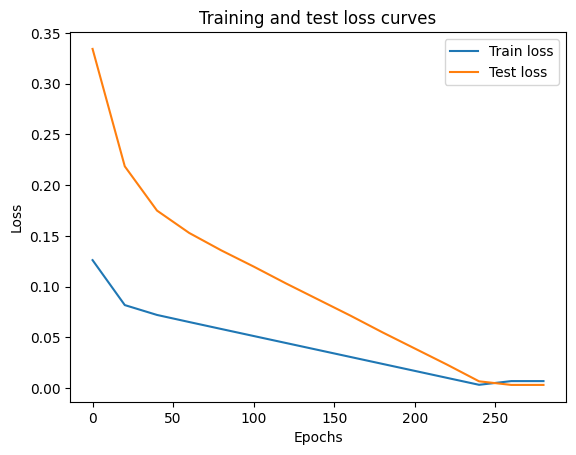

In [59]:
# Print training and testing trends
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

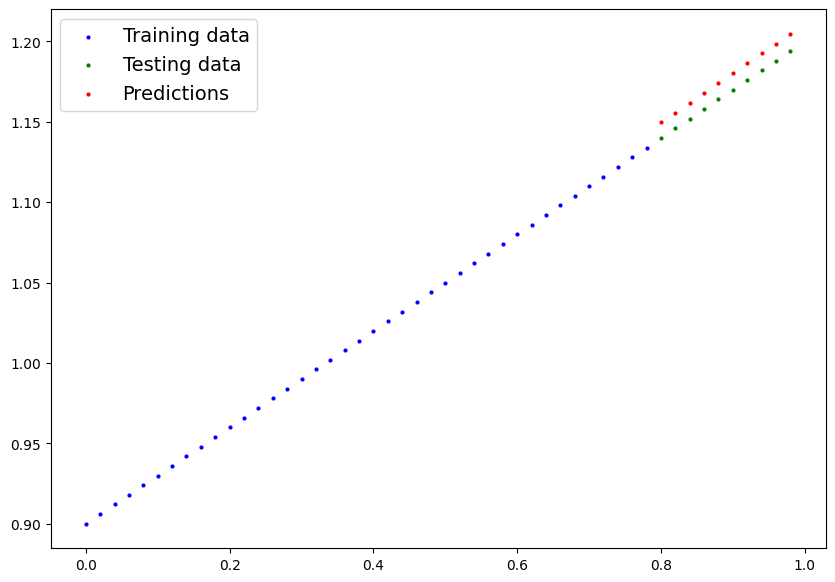

In [60]:
model.eval()
with torch.inference_mode():
    y_pred = model(X_test)
plot_predictions(X_train, Y_train, X_test, Y_test, predictions=y_pred)